## Question 1
- Read data from `Crime.csv` then print the names of the columns which have missing values.
- Drop any row that has missing values.
- Which three subcategories have the top three event counts?

In [106]:
#Your Code Here
import pandas as pd
import numpy as np
df=pd.read_csv('Crime.csv')
df

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20110000389222,11/29/2001,1200.0,12/03/2011,1314.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI
1,20160000201733,06/01/2004,0.0,06/07/2016,1126.0,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN
2,20060000308915,07/25/2006,1536.0,07/25/2006,1536.0,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE
3,2009000018704,09/30/2007,1530.0,01/15/2009,1820.0,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE
4,2008000054923,09/30/2007,0.0,02/11/2008,1532.0,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE
...,...,...,...,...,...,...,...,...,...,...,...
509231,2019000017609,01/14/2019,53.0,01/14/2019,54.0,NARCOTIC,NARC-SELL-COCAINE,WEST,D,D1,SLU/CASCADE
509232,2019000017601,01/14/2019,45.0,01/14/2019,45.0,NARCOTIC,NARC-POSSESS-COCAINE,WEST,K,K3,CHINATOWN/INTERNATIONAL DISTRICT
509233,2019000017906,01/14/2019,0.0,01/14/2019,940.0,CAR PROWL,THEFT-CARPROWL,NORTH,U,U3,SANDPOINT
509234,20070000430946,NaN,NaN,01/01/2007,NaN,RAPE,RAPE-OTHER,UNKNOWN,NaN,NaN,UNKNOWN


In [107]:
missing_columns = df.columns[df.isna().any()]
missing_columns

Index(['Occurred Date', 'Occurred Time', 'Reported Time', 'Crime Subcategory',
       'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [108]:
#Your Code Here
df=df.dropna(axis=0)
df=df.reset_index().drop('index',axis=1) # reset the index
df

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20110000389222,11/29/2001,1200.0,12/03/2011,1314.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI
1,20160000201733,06/01/2004,0.0,06/07/2016,1126.0,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN
2,20060000308915,07/25/2006,1536.0,07/25/2006,1536.0,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE
3,2009000018704,09/30/2007,1530.0,01/15/2009,1820.0,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE
4,2008000054923,09/30/2007,0.0,02/11/2008,1532.0,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE
...,...,...,...,...,...,...,...,...,...,...,...
505722,20190000900500,01/14/2019,200.0,01/14/2019,933.0,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q2,QUEEN ANNE
505723,2019000017935,01/14/2019,143.0,01/14/2019,922.0,BURGLARY-COMMERCIAL,BURGLARY-FORCE-NONRES,NORTH,B,B3,WALLINGFORD
505724,2019000017609,01/14/2019,53.0,01/14/2019,54.0,NARCOTIC,NARC-SELL-COCAINE,WEST,D,D1,SLU/CASCADE
505725,2019000017601,01/14/2019,45.0,01/14/2019,45.0,NARCOTIC,NARC-POSSESS-COCAINE,WEST,K,K3,CHINATOWN/INTERNATIONAL DISTRICT


In [109]:
np.sum(df.isna())

Report Number                  0
Occurred Date                  0
Occurred Time                  0
Reported Date                  0
Reported Time                  0
Crime Subcategory              0
Primary Offense Description    0
Precinct                       0
Sector                         0
Beat                           0
Neighborhood                   0
dtype: int64

In [110]:
#Your Code Here
df[['Report Number','Crime Subcategory']].groupby('Crime Subcategory').agg('count').sort_values(by='Report Number',ascending=False).head(3)

,Report Number
Crime Subcategory,
CAR PROWL,144128
THEFT-ALL OTHER,52389
THEFT-SHOPLIFT,47227


## Question 2
- Create two new columns (these two columns should be datetime objects):
    - `Occurred DateTime`= `Occurred Date` + `Occurred Time` 
    - `Reported DateTime` = `Reported Date` + `Reported Time` 
- Delete the following columns: `Occurred Date`, `Occurred Time`, `Reported Date`, `Reported Time`

- **Hints**: 
    - The panadas function **pd.to_datetime** can help
    - The loaded Occurred/Reported Time appears to be a float like '1930.0'. This should be interpreted as '19:30:00' eventually

In [111]:
#Your Code Here
new_occured_time_list = [] 

for i in df['Occurred Time']:
    if i % 100 == 0:
        time_str = str(int(i // 100)) + ':00'+':00'
    else:
        hour = int(i // 100)
        minutes = int(i % 100)
        if len(str(minutes))==2:
            time_str = str(hour) + ':' + str(minutes)+':00'
        else:
            time_str = str(hour) + ':' + '0' + str(minutes)+':00'


    new_occured_time_list.append(time_str)
new_occured_time = pd.Series(new_occured_time_list)
new_occured_time

0         12:00:00
1          0:00:00
2         15:36:00
3         15:30:00
4          0:00:00
            ...   
505722     2:00:00
505723     1:43:00
505724     0:53:00
505725     0:45:00
505726     0:00:00
Length: 505727, dtype: object

In [112]:
new_report_time_list = [] 

for i in df['Reported Time']:
    if i % 100 == 0:
        time_str = str(int(i // 100)) + ':00'+':00'
    else:
        hour = int(i // 100)
        minutes = int(i % 100)
        if len(str(minutes))==2:
            time_str = str(hour) + ':' + str(minutes)+':00'
        else:
            time_str = str(hour) + ':' + '0' + str(minutes)+':00'


    new_report_time_list.append(time_str)
new_report_time = pd.Series(new_report_time_list)
new_report_time

0         13:14:00
1         11:26:00
2         15:36:00
3         18:20:00
4         15:32:00
            ...   
505722     9:33:00
505723     9:22:00
505724     0:54:00
505725     0:45:00
505726     9:40:00
Length: 505727, dtype: object

In [113]:
#Your Code Here
df['Occurred Datetime']=pd.to_datetime(df['Occurred Date'] + ' ' + new_occured_time)
df['Reported Datetime']=pd.to_datetime(df['Reported Date'] + ' ' + new_report_time)
df.drop(columns=['Occurred Date', 'Occurred Time', 'Reported Date', 'Reported Time'], inplace=True)
df

,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred Datetime,Reported Datetime
0,20110000389222,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,2001-11-29 12:00:00,2011-12-03 13:14:00
1,20160000201733,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN,2004-06-01 00:00:00,2016-06-07 11:26:00
2,20060000308915,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE,2006-07-25 15:36:00,2006-07-25 15:36:00
3,2009000018704,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE,2007-09-30 15:30:00,2009-01-15 18:20:00
4,2008000054923,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE,2007-09-30 00:00:00,2008-02-11 15:32:00
...,...,...,...,...,...,...,...,...,...
505722,20190000900500,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q2,QUEEN ANNE,2019-01-14 02:00:00,2019-01-14 09:33:00
505723,2019000017935,BURGLARY-COMMERCIAL,BURGLARY-FORCE-NONRES,NORTH,B,B3,WALLINGFORD,2019-01-14 01:43:00,2019-01-14 09:22:00
505724,2019000017609,NARCOTIC,NARC-SELL-COCAINE,WEST,D,D1,SLU/CASCADE,2019-01-14 00:53:00,2019-01-14 00:54:00
505725,2019000017601,NARCOTIC,NARC-POSSESS-COCAINE,WEST,K,K3,CHINATOWN/INTERNATIONAL DISTRICT,2019-01-14 00:45:00,2019-01-14 00:45:00


## Question 3

- The crime subcategories are too fine-grained for our analysis. So regroup several subcategories together into 8 major categories: `[Thefts, Burglary, Robbery, Alcohol_Drug, Sex_Related, Homicide, Misc]`

- Construct a mapping dictionary from the subcategories to the corresponding major crime types, then use it by creating a new column called `crime_type`.
mapping dictionary.:
    - For example, we would like to map `CAR PROWL`, `MOTOR VEHICLE THEFT`, ... to `thefts`.
    - We would like to map `ROBBERY-STREET`, `ROBBERY-RESIDENTIAL`,... to `robbery`, etc.
    
**hint**: you can use df[col].map to map a column to values in a dictionary

In [114]:
#Your Code Here
mappingDict={
    'MOTOR VEHICLE THEFT': 'Thefts',
    'THEFT-ALL OTHER': 'Thefts',
    'THEFT-BUILDING': 'Thefts',
    'THEFT-BICYCLE': 'Thefts',
    'THEFT-SHOPLIFT': 'Thefts',
    'BURGLARY-COMMERCIAL': 'Burglary',
    'BURGLARY-RESIDENTIAL-SECURE PARKING': 'Burglary',
    'BURGLARY-COMMERCIAL-SECURE PARKING': 'Burglary',
    'BURGLARY-RESIDENTIAL': 'Burglary',
    'ROBBERY-STREET': 'Robbery',
    'ROBBERY-RESIDENTIAL': 'Robbery',
    'ROBBERY-COMMERCIAL': 'Robbery',
    'LIQUOR LAW VIOLATION': 'Alcohol_Drug',
    'DUI': 'Alcohol_Drug',
    'RAPE': 'Sex_Related',
    'PROSTITUTION': 'Sex_Related',
    'SEX OFFENSE-OTHER': 'Sex_Related',
    'AGGRAVATED ASSAULT-DV': 'Sex_Related',
    'AGGRAVATED ASSAULT': 'Sex_Related',
    'PORNOGRAPHY': 'Sex_Related',
    'HOMICIDE': 'Homicide',
    'CAR PROWL': 'Misc',
    'WEAPON': 'Misc',
    'ARSON': 'Misc',
    'GAMBLE': 'Misc',
    'DISORDERLY CONDUCT': 'Misc',
    'FAMILY OFFENSE-NONVIOLENT': 'Misc',
    'LOITERING': 'Misc'
}
#Your Code Here
df['crime_type']=df['Crime Subcategory'].map(mappingDict)
df

,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred Datetime,Reported Datetime,crime_type
0,20110000389222,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,2001-11-29 12:00:00,2011-12-03 13:14:00,Misc
1,20160000201733,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN,2004-06-01 00:00:00,2016-06-07 11:26:00,Thefts
2,20060000308915,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE,2006-07-25 15:36:00,2006-07-25 15:36:00,Sex_Related
3,2009000018704,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE,2007-09-30 15:30:00,2009-01-15 18:20:00,Thefts
4,2008000054923,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE,2007-09-30 00:00:00,2008-02-11 15:32:00,Thefts
...,...,...,...,...,...,...,...,...,...,...
505722,20190000900500,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q2,QUEEN ANNE,2019-01-14 02:00:00,2019-01-14 09:33:00,Misc
505723,2019000017935,BURGLARY-COMMERCIAL,BURGLARY-FORCE-NONRES,NORTH,B,B3,WALLINGFORD,2019-01-14 01:43:00,2019-01-14 09:22:00,Burglary
505724,2019000017609,NARCOTIC,NARC-SELL-COCAINE,WEST,D,D1,SLU/CASCADE,2019-01-14 00:53:00,2019-01-14 00:54:00,NaN
505725,2019000017601,NARCOTIC,NARC-POSSESS-COCAINE,WEST,K,K3,CHINATOWN/INTERNATIONAL DISTRICT,2019-01-14 00:45:00,2019-01-14 00:45:00,NaN


## Question 4
- Compare `visually` the average time gap between **Reported DateTime** vs **Occurred DateTime** of different crimes types.

**Hints**: 
- You can get the time in seconds from datetime column using `df[col_name].dt.total_seconds()`.
- You can convert seconds to datetime usine `pd.to_timedelta(df["sec"], unit='s')`

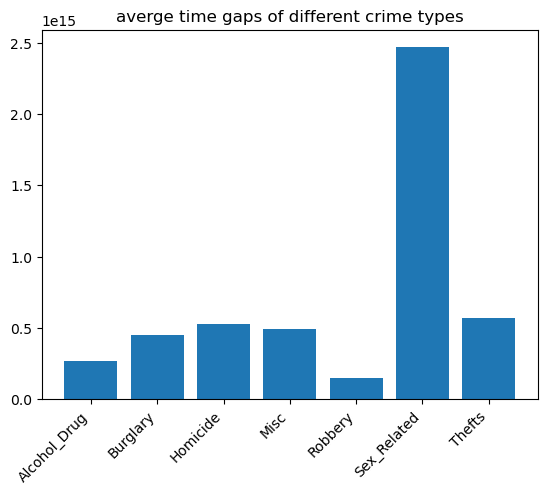

In [115]:
#Your Code Here
import matplotlib.pyplot as plt
df['time gap']=(df['Reported Datetime']-df['Occurred Datetime']).dt.total_seconds()
df1=pd.to_timedelta(df[['time gap','crime_type']].groupby('crime_type').agg('mean')['time gap'],unit='s')
plt.title("averge time gaps of different crime types")
plt.bar(x=df1.index,height=df1.values)
plt.xticks(rotation=45, ha='right') 
plt.show()

## Question 5
- Show `visually` the top 5 most dangerous neighorhood in the EAST Precinct (with number of crime events in each neighorhood)

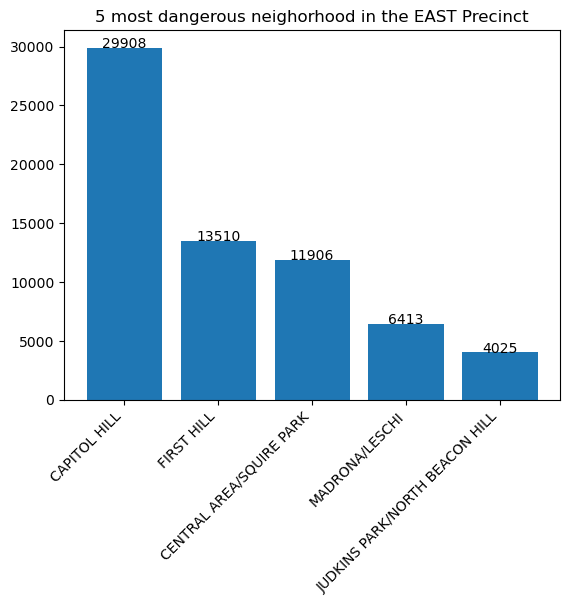

In [116]:
#Your Code Here
east=df[df.Precinct=='EAST'][['Neighborhood','Report Number']].groupby('Neighborhood').agg('count')
east=east.sort_values(by='Report Number',ascending=False).head()
plt.bar(east.index,east['Report Number'])
plt.xticks(rotation=45,ha='right')
for i, value in enumerate(east['Report Number']):
    plt.text(i, value, str(value),ha='center')
plt.title("5 most dangerous neighorhood in the EAST Precinct")
plt.show()

## Question 6
- Create column called **year** that shows the year of the crime. Which year has the lowest and highest crime event counts, respectively?
- Plot the number of `Thefts` crimes in the last ten years

In [117]:
#Your Code Here
df['year']=df['Occurred Datetime'].dt.year
year_crimes=df[['Report Number','year']].groupby('year').agg('count')
print(year_crimes.sort_values(by='Report Number').head(1),' has lowest number of crimes')
print(year_crimes.sort_values(by='Report Number').tail(1),' has highest number of crimes')

      Report Number
year               
1908              1  has lowest number of crimes
      Report Number
year               
2018          50675  has highest number of crimes


In [118]:
#Your Code Here
df_theft=df[df['crime_type']=='Thefts']
df_theft_last=df_theft[(df_theft['year']>=2009) & (df_theft['year']<=2019)]
plot_ten=df_theft_last[['year','Report Number']].groupby('year').agg('count')
plot_ten

,Report Number
year,
2009,14074
2010,14129
2011,14015
2012,15289
2013,16405
2014,18199
2015,16409
2016,16383
2017,16351


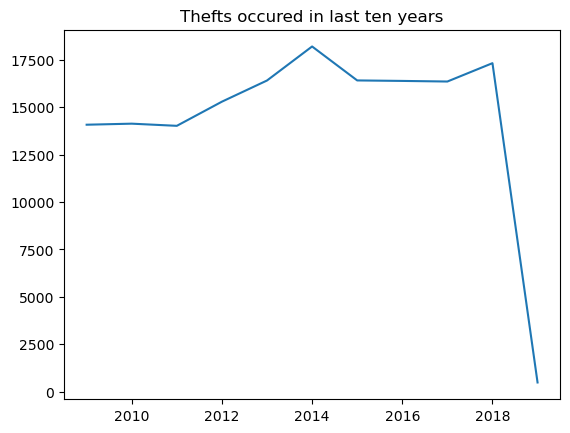

In [119]:
plt.plot(plot_ten)
plt.title('Thefts occured in last ten years')
plt.show()

## Question 7
- keep only crime events occurred in-between **2008-2018** (remove all other crimes).
- Show `visually` which crime type has the highest percentage of events

In [120]:
#Your Code Here
df=df[(df['year']>=2008) & (df['year']<=2018)]
type_crime=df[['Report Number','crime_type']].groupby('crime_type').agg('count')
type_crime

,Report Number
crime_type,
Alcohol_Drug,13903
Burglary,77702
Homicide,261
Misc,156234
Robbery,16909
Sex_Related,32392
Thefts,172890


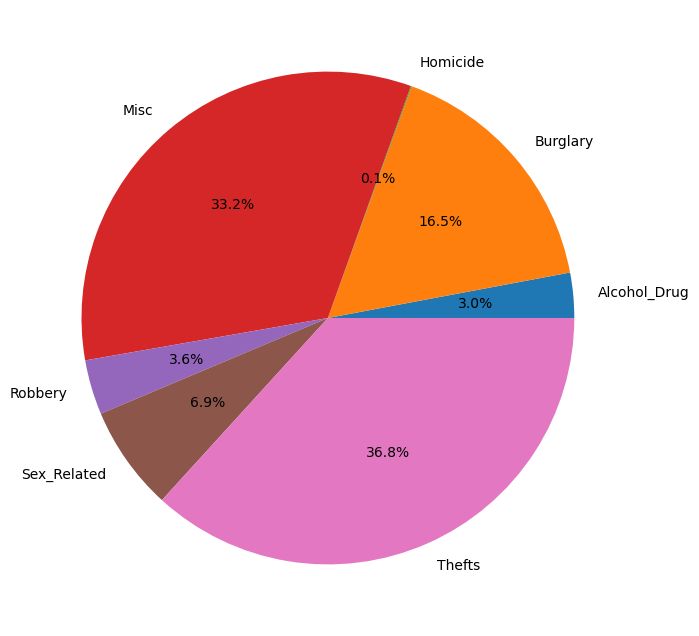

In [121]:
#Your Code Here
plt.figure(figsize=(8, 8))  # Change figure size to 8x8 inches for larger display
plt.pie(x=type_crime['Report Number'], labels=type_crime.index, autopct='%1.1f%%')  
plt.show()

## Question 8
- Analyze the crime prevalence in terms of week days (create column called `day` that specifies the day of the crime).
- Which weekday (Sunday, Monday, ....Saturday) has highest/lowest daily Homicide crime count? (Visualize your findings)

**Hint:** use `.day_name()` with time object to get the day

In [122]:
#Your Code Here
df['day']=df['Occurred Datetime'].dt.day_name()
df.reset_index(inplace=True)

/var/folders/wg/gps_fyv92832dhz11svfljyr0000gn/T/ipykernel_95543/2573085544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day']=df['Occurred Datetime'].dt.day_name()


In [123]:
df

,index,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred Datetime,Reported Datetime,crime_type,time gap,year,day
0,10,2008000013991,CAR PROWL,THEFT-CARPROWL,NORTH,N,N1,BITTERLAKE,2008-01-01 00:30:00,2008-01-11 17:53:00,Misc,926580.0,2008,Tuesday
1,11,20080000474,THEFT-BUILDING,THEFT-BUILDING,EAST,E,E1,CAPITOL HILL,2008-01-01 00:30:00,2008-01-01 09:13:00,Thefts,31380.0,2008,Tuesday
2,12,2008000060,DUI,DUI-LIQUOR,WEST,Q,Q3,SLU/CASCADE,2008-01-01 00:10:00,2008-01-01 00:10:00,Alcohol_Drug,0.0,2008,Tuesday
3,13,200800002278,NARCOTIC,NARC-POSSESS-COCAINE,WEST,D,D1,BELLTOWN,2008-01-02 20:00:00,2008-01-02 20:00:00,NaN,0.0,2008,Wednesday
4,14,200800008276,CAR PROWL,THEFT-AUTOACC,WEST,Q,Q2,QUEEN ANNE,2008-01-04 11:00:00,2008-01-07 16:02:00,Misc,277320.0,2008,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503220,504168,20190000900012,THEFT-ALL OTHER,THEFT-OTH,SOUTHWEST,W,W2,ALASKA JUNCTION,2018-12-31 00:00:00,2019-01-01 13:38:00,Thefts,135480.0,2018,Monday
503221,504169,20190000900013,CAR PROWL,THEFT-CARPROWL,EAST,G,G1,FIRST HILL,2018-12-31 00:00:00,2019-01-01 13:44:00,Misc,135840.0,2018,Monday
503222,504170,201900001871,THEFT-ALL OTHER,THEFT-OTH,EAST,E,E2,CAPITOL HILL,2018-12-31 00:00:00,2019-01-02 15:00:00,Thefts,226800.0,2018,Monday
503223,504171,20190000900413,THEFT-ALL OTHER,THEFT-OTH,NORTH,U,U1,UNIVERSITY,2018-12-31 00:00:00,2019-01-11 14:34:00,Thefts,1002840.0,2018,Monday


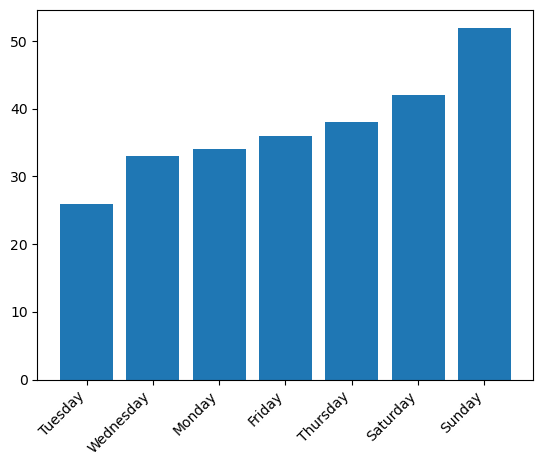

Tuesday is the lowest
Sunday is the highest


In [124]:
#Your Code Here
Homicide=df[df.crime_type=='Homicide'][['day','Report Number']].groupby('day').agg('count').sort_values(by='Report Number')
plt.bar(Homicide.index,Homicide['Report Number'])
plt.xticks(rotation=45,ha='right')
plt.show()
print('Tuesday is the lowest')
print('Sunday is the highest')

## Extra Credit Questions

- Consider the 24 hours window into 6 frames '12am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am'. Create a column called `Occured TimeFrame` that contains the crime occurred time frame.

- Compare `visually` time-frames in term of the number of crimes.
- Print the name of the most dangerous neighborhood in the WEST Precinct, Then Show `visually` the percentages of crimes during different TimeFrames in that neighborhood

In [134]:
# Your Code Here
frames=['12am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am']
def time_to_slots(hour):
    if 0 <= hour < 4:
        frame = frames[0]
    elif 4 <= hour < 8:
        frame = frames[1]
    elif 8 <= hour < 12:
        frame = frames[2]
    elif 12 <= hour < 16:
        frame = frames[3]
    elif 16 <= hour < 20:
        frame = frames[4]
    else:
        frame = frames[5]
    return frame
df['Occurred TimeFrame']=df['Occurred Datetime'].dt.hour.apply(time_to_slots)

/var/folders/wg/gps_fyv92832dhz11svfljyr0000gn/T/ipykernel_95543/564440524.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occurred TimeFrame']=df['Occurred Datetime'].dt.hour.apply(time_to_slots)


In [135]:
df

,level_0,index,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred Datetime,Reported Datetime,crime_type,time gap,year,day,Occurred TimeFrame
0,0,10,2008000013991,CAR PROWL,THEFT-CARPROWL,NORTH,N,N1,BITTERLAKE,2008-01-01 00:30:00,2008-01-11 17:53:00,Misc,926580.0,2008,Tuesday,12am-4am
1,1,11,20080000474,THEFT-BUILDING,THEFT-BUILDING,EAST,E,E1,CAPITOL HILL,2008-01-01 00:30:00,2008-01-01 09:13:00,Thefts,31380.0,2008,Tuesday,12am-4am
2,2,12,2008000060,DUI,DUI-LIQUOR,WEST,Q,Q3,SLU/CASCADE,2008-01-01 00:10:00,2008-01-01 00:10:00,Alcohol_Drug,0.0,2008,Tuesday,12am-4am
3,3,13,200800002278,NARCOTIC,NARC-POSSESS-COCAINE,WEST,D,D1,BELLTOWN,2008-01-02 20:00:00,2008-01-02 20:00:00,NaN,0.0,2008,Wednesday,8pm-12am
4,4,14,200800008276,CAR PROWL,THEFT-AUTOACC,WEST,Q,Q2,QUEEN ANNE,2008-01-04 11:00:00,2008-01-07 16:02:00,Misc,277320.0,2008,Friday,8am-12pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503220,503220,504168,20190000900012,THEFT-ALL OTHER,THEFT-OTH,SOUTHWEST,W,W2,ALASKA JUNCTION,2018-12-31 00:00:00,2019-01-01 13:38:00,Thefts,135480.0,2018,Monday,12am-4am
503221,503221,504169,20190000900013,CAR PROWL,THEFT-CARPROWL,EAST,G,G1,FIRST HILL,2018-12-31 00:00:00,2019-01-01 13:44:00,Misc,135840.0,2018,Monday,12am-4am
503222,503222,504170,201900001871,THEFT-ALL OTHER,THEFT-OTH,EAST,E,E2,CAPITOL HILL,2018-12-31 00:00:00,2019-01-02 15:00:00,Thefts,226800.0,2018,Monday,12am-4am
503223,503223,504171,20190000900413,THEFT-ALL OTHER,THEFT-OTH,NORTH,U,U1,UNIVERSITY,2018-12-31 00:00:00,2019-01-11 14:34:00,Thefts,1002840.0,2018,Monday,12am-4am


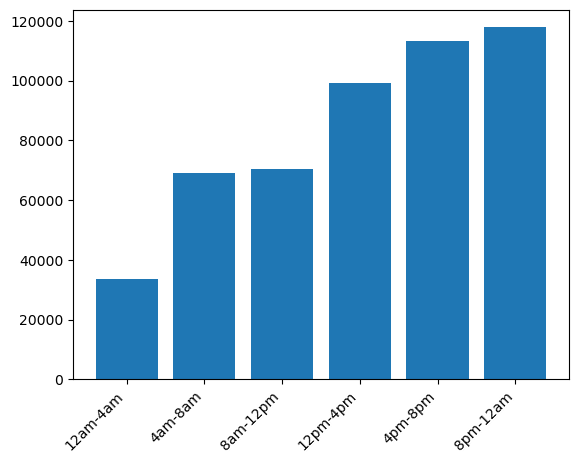

In [139]:
#Your Code Here
df2=df[['Occurred TimeFrame','Report Number']].groupby('Occurred TimeFrame').agg('count').sort_values(by='Report Number')
plt.bar(frames,df2['Report Number'])
plt.xticks(rotation=45,ha='right')
plt.show()


In [142]:
#Your Code Here
df[df['Precinct']=='WEST'][['Neighborhood','Report Number']].groupby('Neighborhood').agg('count').sort_values(by='Report Number').tail(1)

,Report Number
Neighborhood,
DOWNTOWN COMMERCIAL,47374


In [145]:
df3=df[df.Neighborhood=='DOWNTOWN COMMERCIAL'][['Occurred TimeFrame','Report Number']].groupby('Occurred TimeFrame').agg('count')

In [146]:
df3

,Report Number
Occurred TimeFrame,
12am-4am,3620
12pm-4pm,12768
4am-8am,2360
4pm-8pm,12947
8am-12pm,7566
8pm-12am,8113


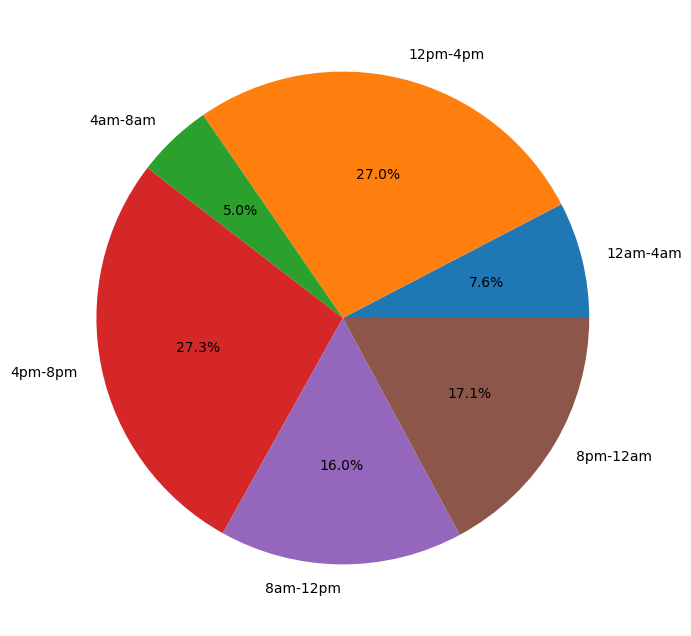

In [148]:
#Your Code Here
plt.figure(figsize=(8, 8))  # Change figure size to 8x8 inches for larger display
plt.pie(x=df3['Report Number'], labels=df3.index, autopct='%1.1f%%')  
plt.show()